<a href="https://colab.research.google.com/github/kajalDhun114/EDA-Project-onAirbnb-project/blob/main/mykajalairbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

####airnb is an online marketplace that connects people who want to rent out their homes with people looking for accomodations in that local.
###NYC is the most populus city in the US,and one of the most popular tourism and buisness places globally

In [1]:
#Import the main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#download the data set and read it as pandas data frame 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##importing airbnb csv file as df

In [3]:
# to load the dataset ,we will load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')

In [4]:
#checking amount of rows in given dataset to understand the size we are working with
len(df)

48895

In [5]:
#checking type of every column in the dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# In our case, missing data that is observed does not need too 

---

much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data

In [10]:
df.rename(columns={"name":"property_type"},inplace=True)

##Data profiling and data cleaning(lets getsummary of the dataset we have)

######here we saw that,we have 2 columns which have more than 10000 null values.
######having so many null values is not propriate for searching or exploring data or for analyse of any form.so i have to clean the data by dropping certain attributes that is not needed to choose i.e. 'ID' ,'Host_name', 'last_reviews'....

In [13]:
#drop unwanted columns...unwanted coulumns are last_review ,host_name,id
df.drop(['host_name','id','last_review'], axis = 1,inplace = True)
df

,property_type,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Please note that we are dropping'host_name' not only because it is insignificant but also for ethical reasons. There should be no reasoning to continue data exploration and model training (which we will be doing later) towards specific individuals based on their names. Why is that? Those names are assigned to actual humans, also they present no security threat or military/governmental interest based on the nature of the dataset, therefore names are unimportant to us

In [14]:
#replace all null values in review_per_month to 0
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

In [15]:
#examining the unique values of n_group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(df.neighbourhood.unique())

221

In [17]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [18]:
#examining the unique values of room_type as this column will appear very handy for later analysis
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
#examining the unique values of property_type 
df.property_type.unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

Understanding unique values and categorical data that we have in our dataset was the last step we had to do. It looks like for those columns' values we will be doing some mapping to prepare the dataset for predictive analysis

In [20]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [21]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
top_host_df

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [22]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [23]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

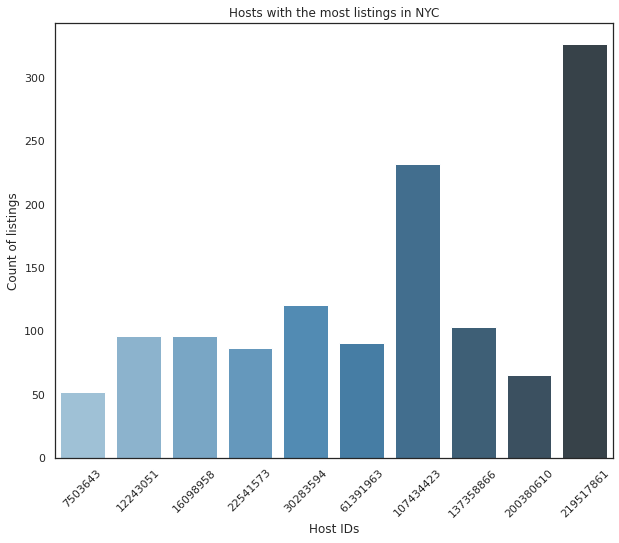

In [24]:
d_1=sns.barplot(x="Host_ID", y="Count", data=top_host_df,
                 palette='Blues_d')
d_1.set_title('Hosts with the most listings in NYC')
d_1.set_ylabel('Count of listings')
d_1.set_xlabel('Host IDs')
d_1.set_xticklabels(d_1.get_xticklabels(), rotation=45)

Interesting, we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings

In [26]:
#lets take a closer look of what we have
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


here 50% denotes the median


###here,we can use boxplot for removing some outliers..lets understand it better by boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

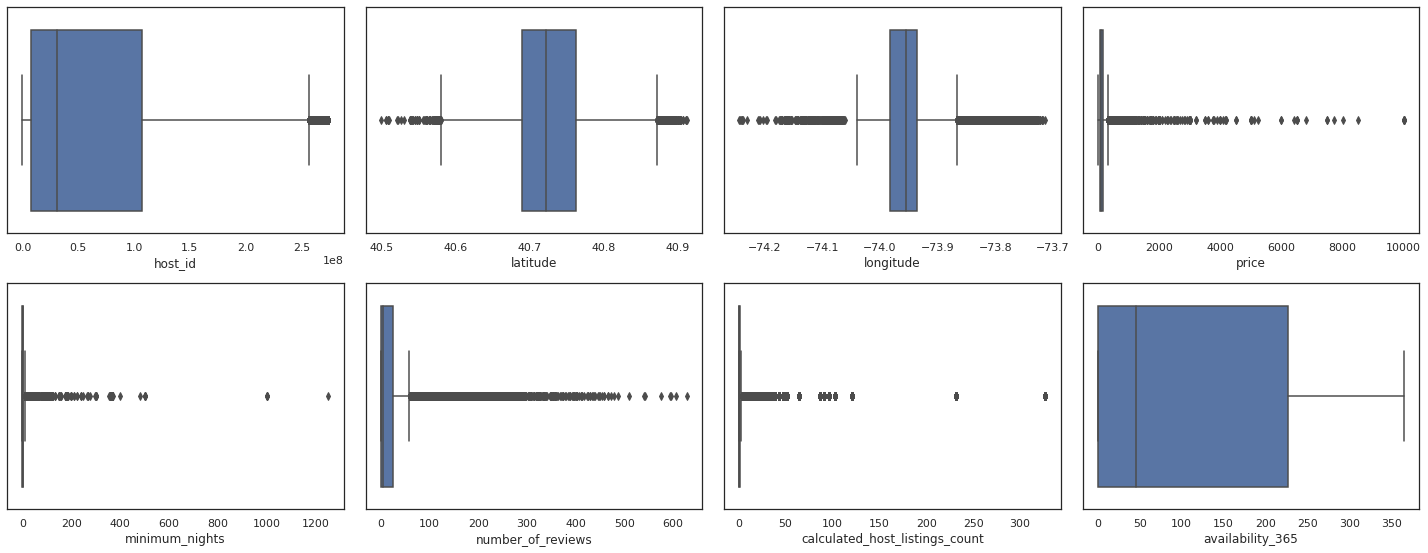

In [27]:
# check outliers in numerical columns with seaborn boxplot
columns = ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

##(Question--1)..Removing outliers from our dataset

1--(a).remove outliers for {{{{price}}}} column

In [28]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



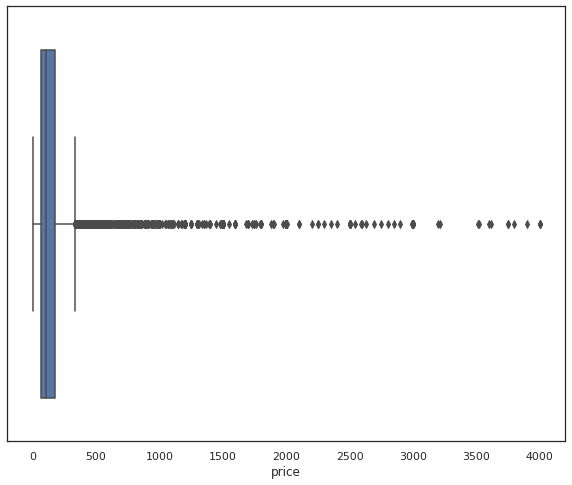

In [29]:
df.loc[df['price']>4000,'price'] = df.loc[df['price']<4000,'price'].median()
sns.boxplot(df['price'])

1--(c).remove outliers for{{ {minimum_nights}}}column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



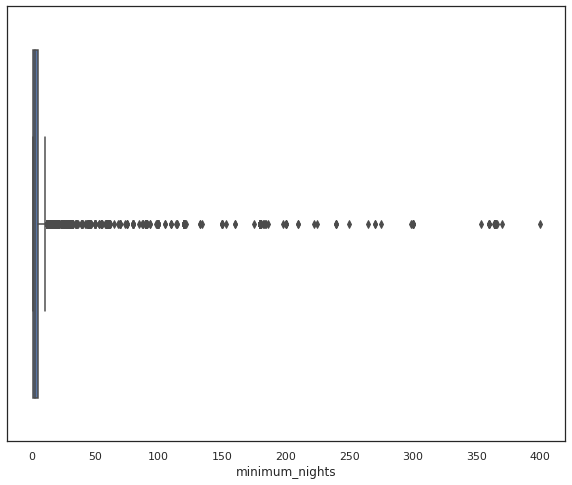

In [30]:
df.loc[df['minimum_nights']>400,'minimum_nights'] = df.loc[df['minimum_nights']<400,'minimum_nights'].median()
sns.boxplot(df['minimum_nights'])

1--(d).remove outliers for{{ {number_of_reviews}}}column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



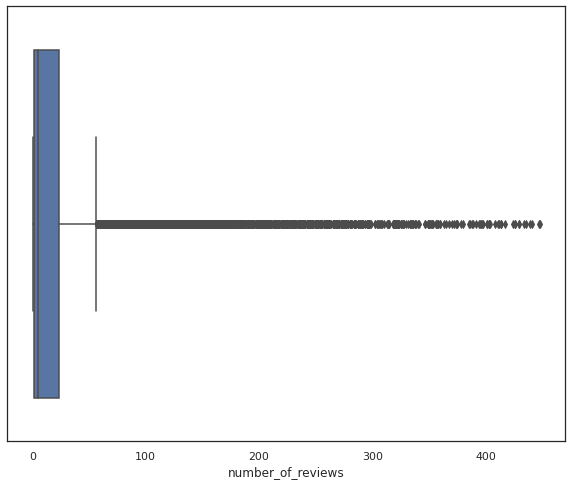

In [32]:
df.loc[df['number_of_reviews']>450,'number_of_reviews'] = df.loc[df['number_of_reviews']<450,'number_of_reviews'].median()
sns.boxplot(df['number_of_reviews'])

1--(e).remove outliers for{{ {calculated_host_listings_count}}}column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



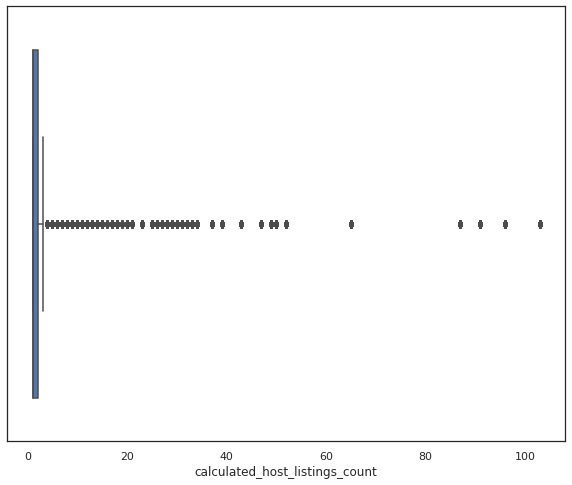

In [34]:
df.loc[df['calculated_host_listings_count']>120,'calculated_host_listings_count'] = df.loc[df['calculated_host_listings_count']<120,'calculated_host_listings_count'].median()
sns.boxplot(df['calculated_host_listings_count'])

####(Question--2).How do prices of listings vary by location?

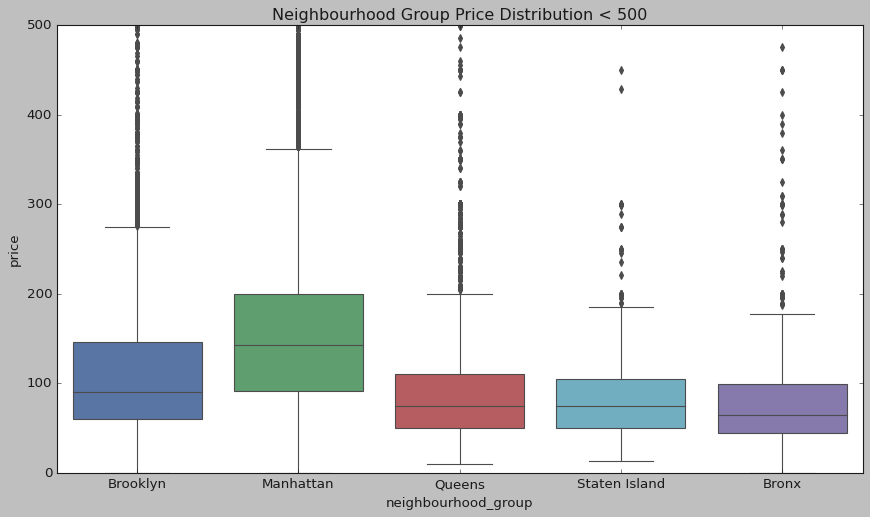

In [35]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df[df.price<500])
plt.show()

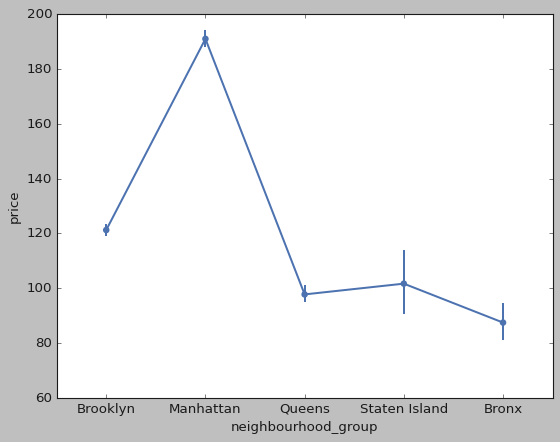

In [36]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=df )

Manhattan receives the highest location scores for price. Now it is obvious that the highly rated location would also tend to be costly

####(Question--3).How does the demand for Airbnb differ by locations?


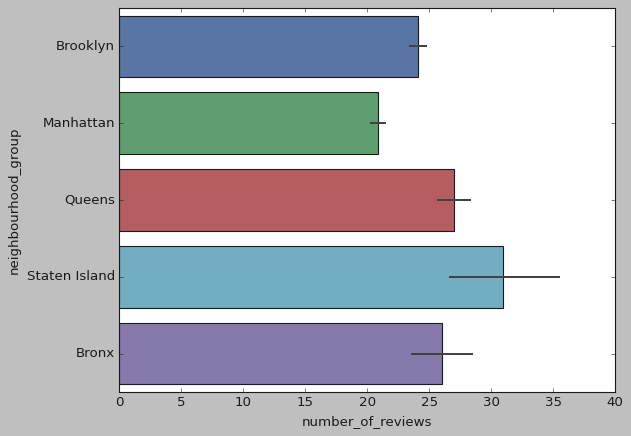

In [37]:
#barplot of checking number_of_reviews for each neighbouehood_group 
demands=sns.barplot(x="number_of_reviews",y="neighbourhood_group",data=df)
demands
plt.show()

we clearly see here that,Staten island is the most reviewed airbnb.and thats why statenisland has greater demands of airbnb.after it Queen is on 2nd place.and then Bronx,and after it Brooklyn and then at last manhattan.

####(Question_5)--which airbnb has highest share of hotels?

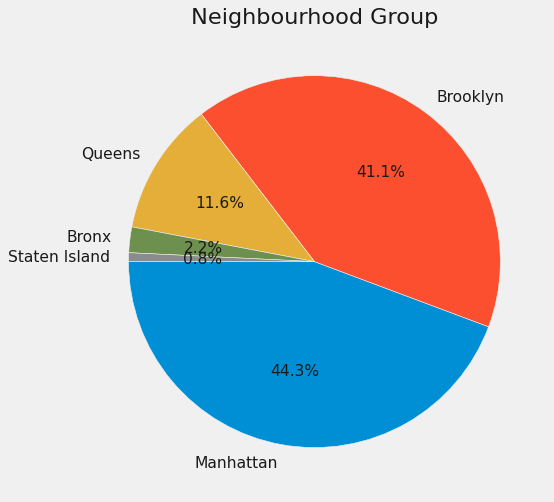

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.


####(Question--6)..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



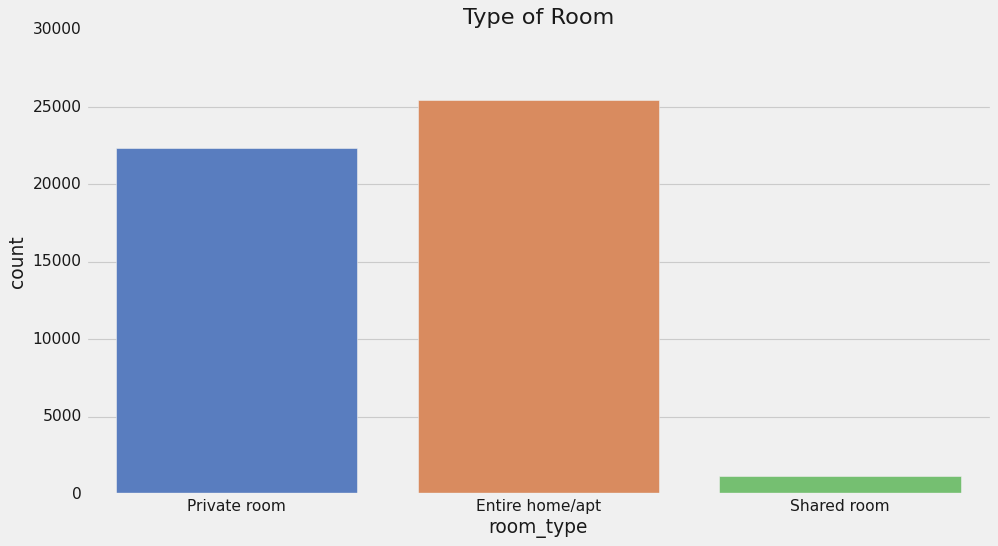

In [39]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

####(question-7)--Let’s see room types occupied by a neighborhood group.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



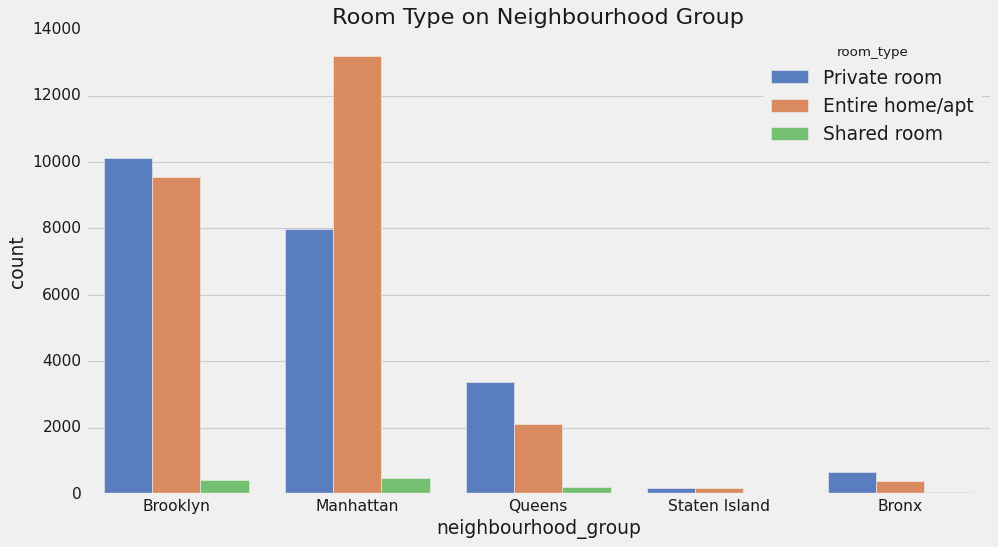

In [40]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

HERE WE CAN SEE, that 

1.Broolyn have the highest private rooms booking.

2.manhattan have the highest entire home/apt. boking

3.queens have the highest private room bookings which was much lesser than brooklyn and manhattan.

4.staten island have lesse tha 500 bookings in which private rooms booking are most.this is much lesser than all.

5.Bronx have highest booking in private rooms .

but we can easily observe that manhattan has the largest bookings.

####(question-7)--show the relationship between the availability room and neighborhood group.which airbnb available most among all.


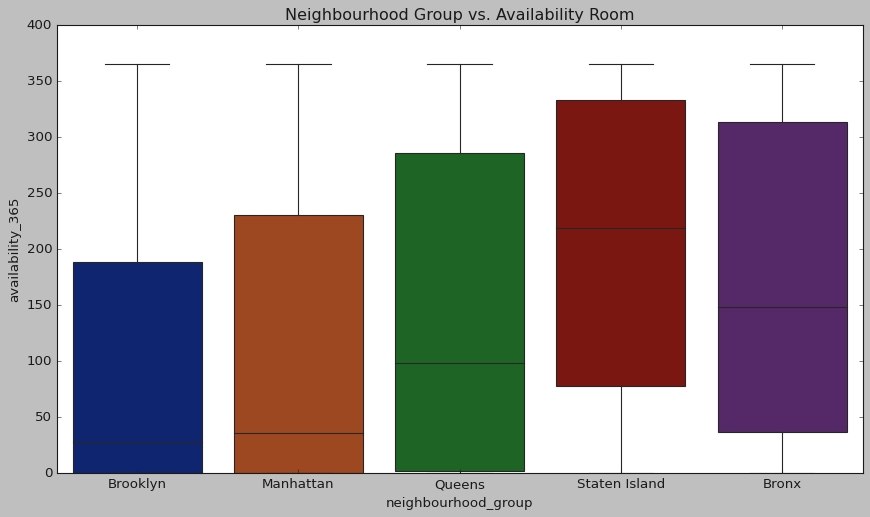

In [41]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

####(Question-8)--correlation between the columns

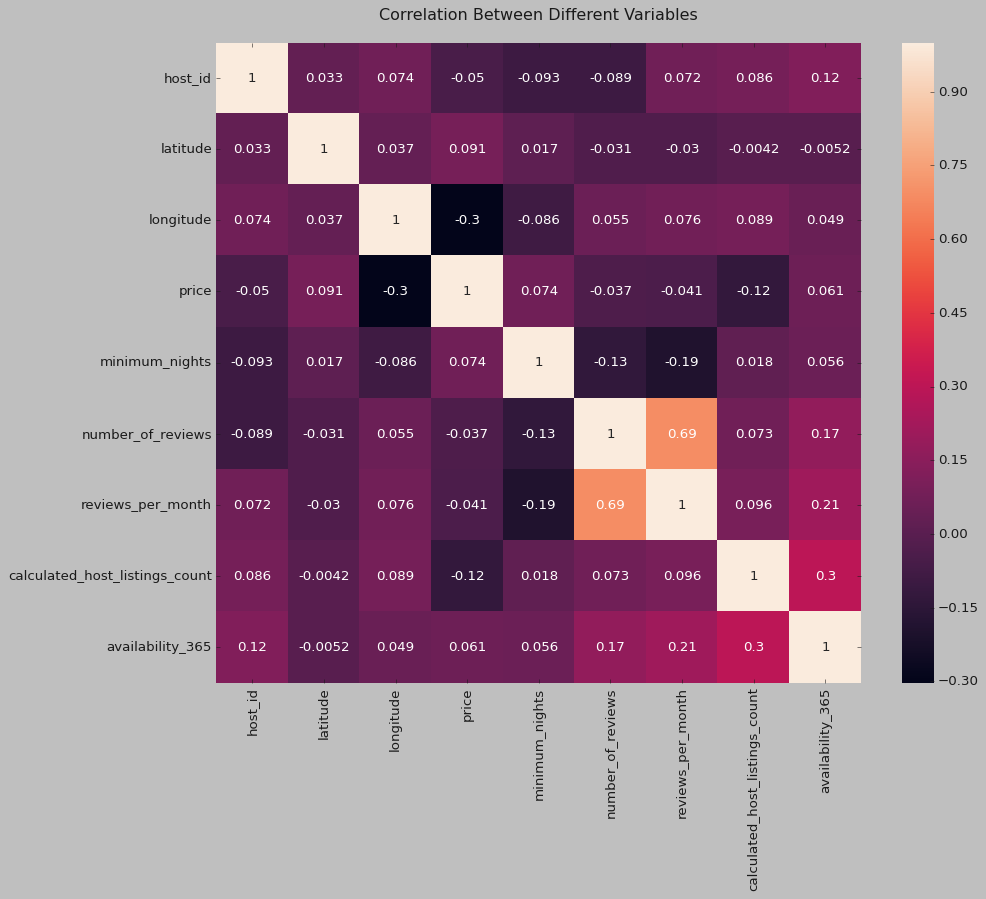

In [42]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

####(Question-9)--relation between price and reviews per month.

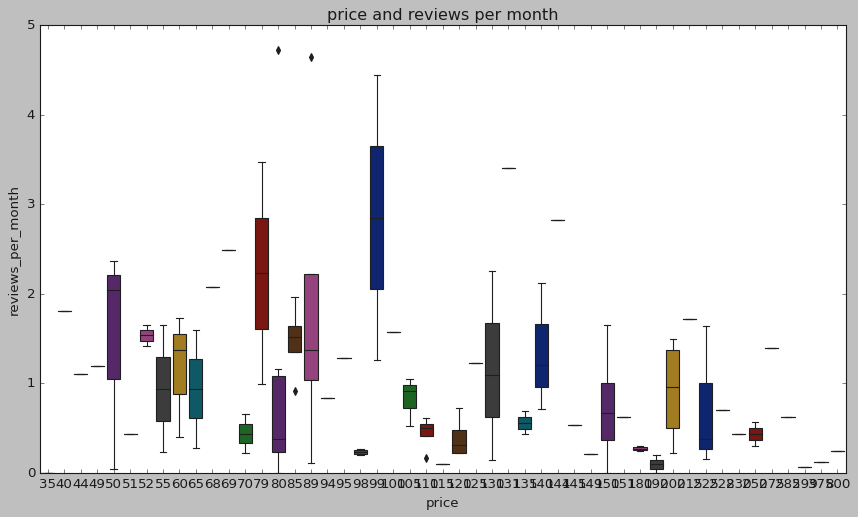

In [45]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("price and reviews per month")
sns.boxplot(data=df.head(100), x='price',y='reviews_per_month',palette="dark")
plt.show()

In [46]:
#average price of airbnb in different neighbourhood by avgPrice
avgprice_neighbourhood=df.groupby("neighbourhood").agg({"price":"mean"}).reset_index()
avgprice_neighbourhood.rename(columns={'price':'avgPrice'},inplace=True)
s=avgprice_neighbourhood.head(10)
s

,neighbourhood,avgPrice
0,Allerton,87.595238
1,Arden Heights,67.250000
2,Arrochar,115.000000
3,Arverne,171.779221
4,Astoria,106.193333
5,Bath Beach,81.764706
6,Battery Park City,261.914286
7,Bay Ridge,115.390071
8,Bay Terrace,142.000000
9,"Bay Terrace, Staten Island",102.500000


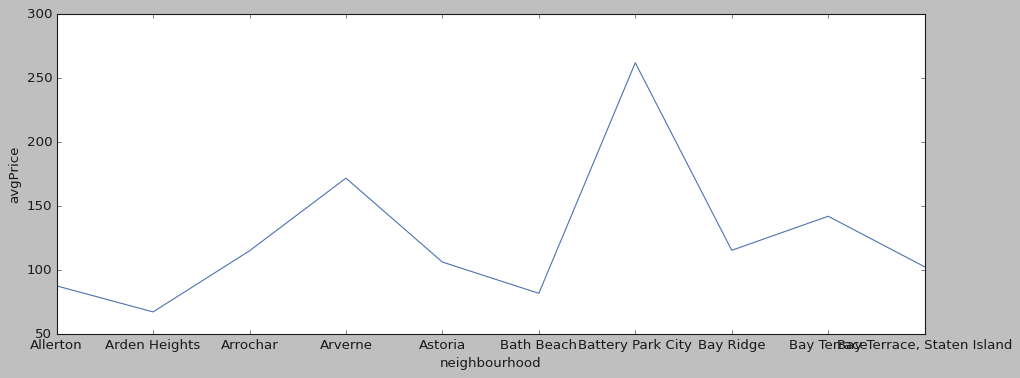

In [47]:
#lineplot graph for neighbourhood by avg_price
from matplotlib import pyplot as plot
plt.figure(figsize=(14,5))
sns.lineplot(x="neighbourhood",y="avgPrice",data=s)
plt.show()

(Question--10)-Density of reviews per month.
*   List item
> Indented block
*   List item
*   List item
*   List item



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



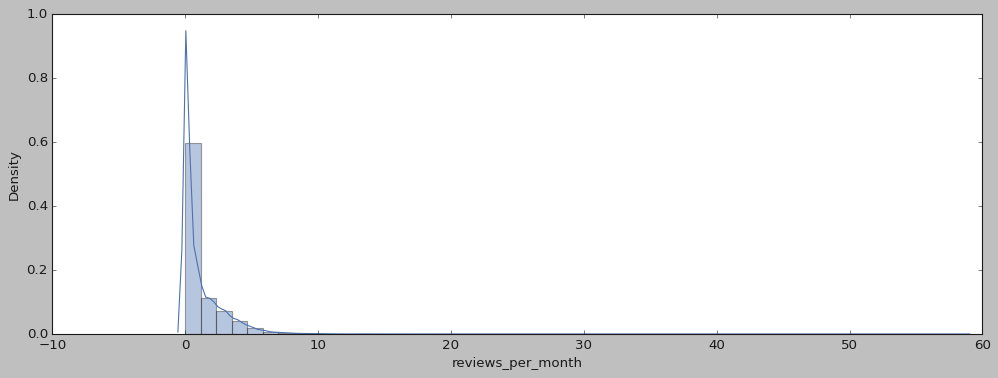

In [48]:
#desity of reviews_per_month
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['reviews_per_month'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



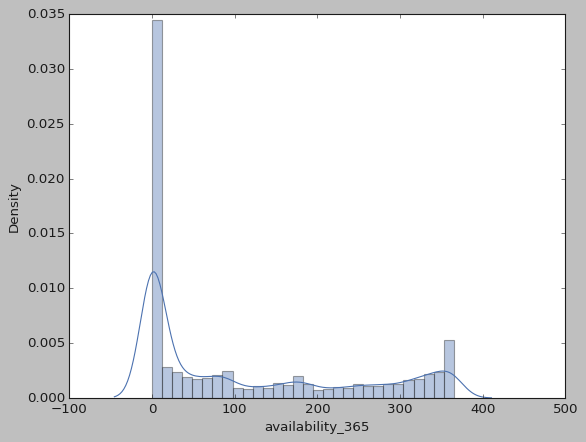

In [49]:
#density of availability_365
sns.distplot(df['availability_365'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



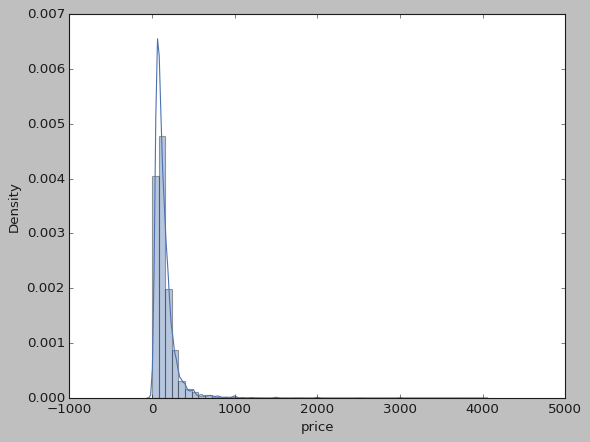

In [50]:
#density according to price
sns.distplot(df['price'],hist=True)

In [51]:
df['price'].max()

4000

In [52]:
df['minimum_nights'].max()

400

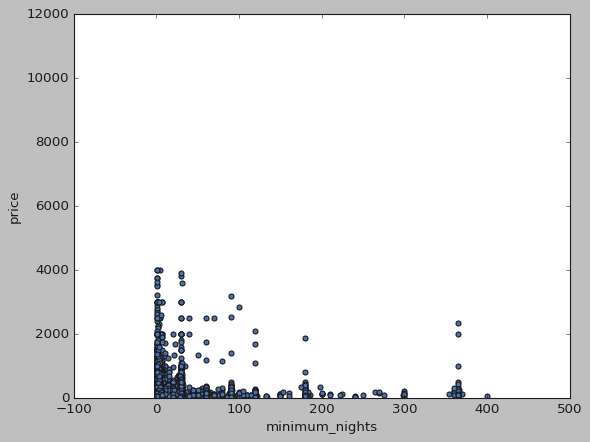

In [53]:
min_nights = 'minimum_nights'
df_1=pd.concat([df['price'],df[min_nights]],axis=1)
df_1.plot.scatter(x=min_nights,y='price',ylim=(0,12000))

####(Question--11)--Room_type V/S Price

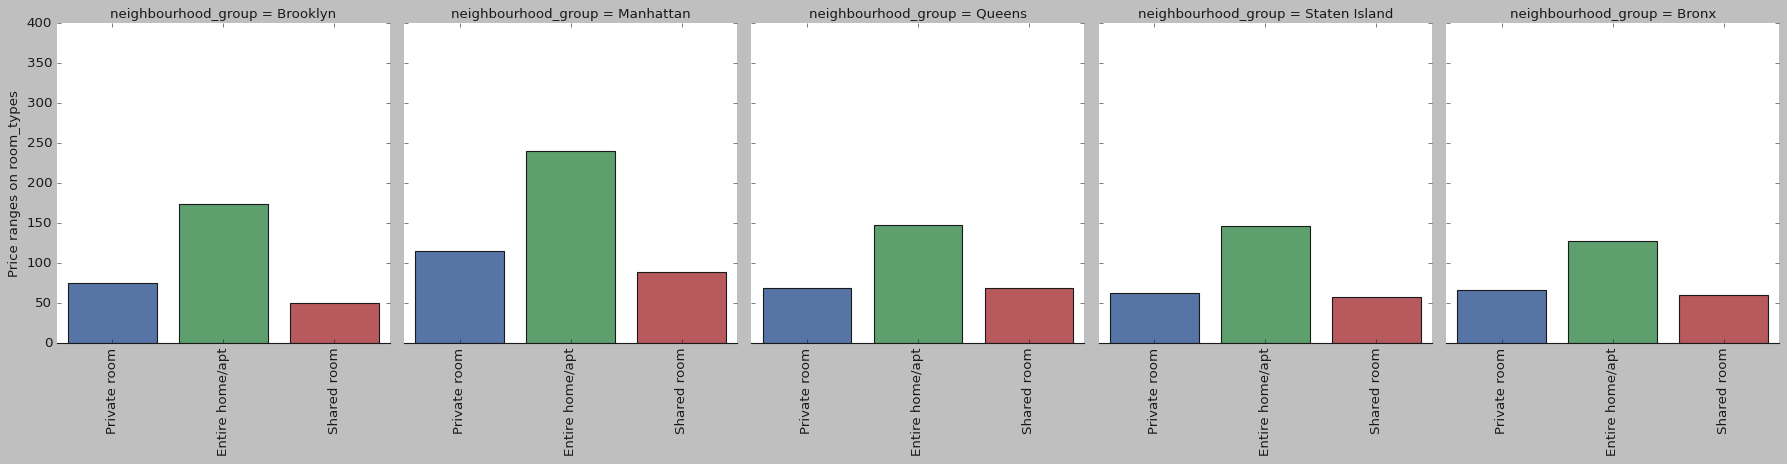

In [54]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 


####(Question-12)--Neighbourhood location according to latitude and longitude..

Text(0.5, 1.0, 'Location Co-ordinates')

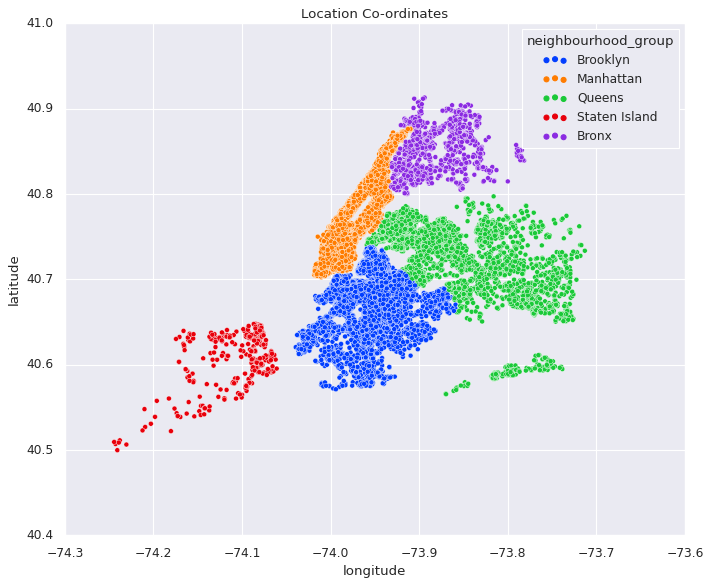

In [55]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')